<a href="https://colab.research.google.com/github/Sakshiipaidalwar/Codsoft-Intern-Project-1/blob/main/Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT CARD FRAUD DETECTION

This is a dataset containing credit card transactions with 31 features and a class label. The features represent various aspects of the transaction, and the class label indicates whether the transaction was fraudulent (class 1) or not (class 0).

The first feature is "Time", which represents the number of seconds elapsed between the transaction and the first transaction in the dataset. The next 28 features, V1 to V28, are anonymized variables resulting from a principal component analysis (PCA) transformation of the original features. They represent different aspects of the transaction, such as the amount, location, and type of transaction.

The second last feature is "Amount", which represents the transaction amount in USD. The last feature is the "Class" label, which indicates whether the transaction is fraudulent (class 1) or not (class 0).

Overall, this dataset is used to train machine learning models to detect fraudulent transactions in real-time. The features are used to train the model to learn patterns in the data, which can then be used to detect fraudulent transactions in future transactions.

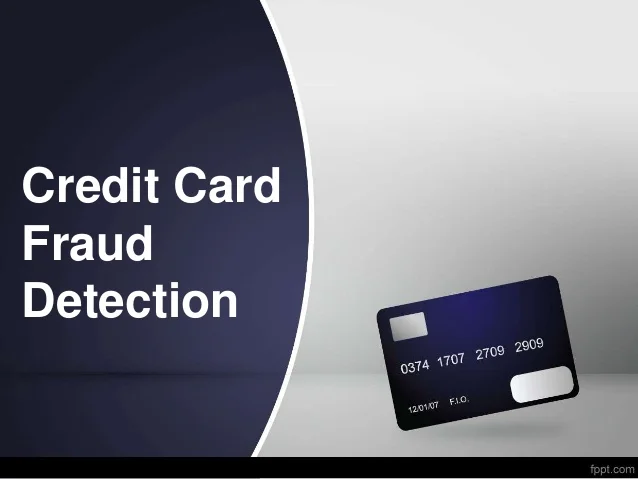

## 1) Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##2) Loading & Exploring Dataset

In [ ]:
credit_card_data = pd.read_csv('/content/Credit Card Fraud Detection.csv')

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
20409,31025,-0.724757,0.649594,1.727010,-0.539584,0.889184,-1.034725,1.456742,-0.716376,-0.216859,...,-0.069338,0.250276,-0.281149,0.476644,0.384563,0.324725,-0.442016,-0.363683,0.00,0.0
20410,31026,-2.317953,-0.691477,1.265161,-0.376933,2.573624,-1.276860,-0.633667,0.205119,-0.307739,...,-0.398602,-1.058315,-0.618345,-0.861632,0.328694,0.092234,0.367453,0.006334,0.89,0.0
20411,31026,-1.327280,1.224650,0.796178,1.153083,-0.236519,0.924243,0.310683,0.751678,-0.420871,...,0.042767,0.429560,-0.098114,-0.278733,-0.149580,-0.214172,0.347256,0.151598,82.57,0.0
20412,31027,0.132756,-0.431359,-0.909160,-3.105432,1.878086,2.976224,-0.320295,0.627178,-2.848177,...,-0.068812,0.021002,-0.077043,0.995254,-0.255149,-0.219462,0.167155,0.166190,25.00,0.0
20413,31027,1.257126,0.344870,0.303501,0.694626,-0.385154,-1.077230,0.075644,-0.194959,0.055911,...,-0.289668,-0.842265,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_data.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2795,2347,-1.045947,0.03723,2.50566,0.201052,0.269375,0.010774,-0.254784,0.409712,0.133263,...,0.043844,0.017746,-0.205174,-0.008489,0.537949,-0.48993,-0.006265,-0.012438,12.99,0.0


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    20414 non-null  int64  
 1   V1      20414 non-null  float64
 2   V2      20414 non-null  float64
 3   V3      20414 non-null  float64
 4   V4      20414 non-null  float64
 5   V5      20414 non-null  float64
 6   V6      20414 non-null  float64
 7   V7      20414 non-null  float64
 8   V8      20414 non-null  float64
 9   V9      20414 non-null  float64
 10  V10     20414 non-null  float64
 11  V11     20414 non-null  float64
 12  V12     20414 non-null  float64
 13  V13     20414 non-null  float64
 14  V14     20414 non-null  float64
 15  V15     20414 non-null  float64
 16  V16     20414 non-null  float64
 17  V17     20414 non-null  float64
 18  V18     20414 non-null  float64
 19  V19     20414 non-null  float64
 20  V20     20414 non-null  float64
 21  V21     20414 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    20327
1.0       86
Name: count, dtype: int64

## 3) Handling highly unblanced Dataset
0 --> Normal Transaction

1 --> fraudulent transaction

The first line of code creates a new dataframe called "legit" by selecting only the rows from the original "credit_card_data" dataframe where the "Class" label is equal to 0. In other words, it filters out all transactions labeled as fraudulent (Class == 1) and keeps only the legitimate transactions (Class == 0).

The second line of code creates a new dataframe called "fraud" by selecting only the rows from the original "credit_card_data" dataframe where the "Class" label is equal to 1. This filters out all legitimate transactions and keeps only the fraudulent transactions.

By separating the data into two dataframes, it becomes easier to analyze and compare the characteristics of legitimate and fraudulent transactions separately. This can be useful for identifying patterns or features that are more common in fraudulent transactions, which can then be used to develop models for fraud detection.

In [ ]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [ ]:
fraud['Class']

541      1.0
623      1.0
4920     1.0
6108     1.0
6329     1.0
        ... 
18466    1.0
18472    1.0
18773    1.0
18809    1.0
20198    1.0
Name: Class, Length: 86, dtype: float64

In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    20327.000000
mean        70.599121
std        205.057935
min          0.000000
25%          5.985000
50%         16.520000
75%         60.000000
max       7879.420000
Name: Amount, dtype: float64

"count" indicates the total number of transactions in the dataset that have a valid "Amount" value (i.e., non-missing values). "mean" is the average transaction amount for all the transactions in the dataset. In this case, the mean is 88.291022, indicating that the average transaction amount is around
5.65 USD. "50%" is the median transaction amount, which is the value that separates the lower half of the transactions from the upper half. In this case, the median is 22.0, indicating that half of the transactions have a value less than or equal to
77.05 USD. "max" is the largest transaction amount in the dataset. In this case, the largest transaction amount is 25,691.16, indicating that there may be some transactions with very large values.

In [ ]:
fraud.Amount.describe()

count      86.000000
mean       93.996860
std       260.195133
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,15872.041226,-0.208046,0.208776,0.802160,0.248245,-0.139011,0.103222,-0.106625,0.001945,0.631723,...,0.035034,-0.047973,-0.142292,-0.037083,0.011362,0.123110,0.030792,0.010198,0.007013,70.599121
1.0,17592.162791,-8.792044,6.504115,-12.461366,6.302522,-6.112129,-2.534417,-8.479521,4.438385,-3.005413,...,0.704824,0.536947,-0.386820,-0.379114,-0.264854,0.349233,0.177437,0.867258,0.096510,93.996860


Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

legit_sample = legit.sample(n=492) is a line of code that takes a random sample of 492 observations from the legit dataset. This is done to balance the number of observations in the legit and fraud datasets, which is necessary for training a machine learning model to predict fraud. Since the original dataset has a large number of legitimate transactions and a small number of fraudulent transactions, the model may be biased towards predicting that all transactions are legitimate. By creating a balanced dataset with an equal number of legitimate and fraudulent transactions, the model can be trained to better recognize the patterns that differentiate fraudulent transactions from legitimate ones

In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7567,10433,0.834328,-1.458297,0.635006,-0.174999,-1.080117,0.860685,-0.942050,0.243444,0.979518,...,0.278238,0.809878,-0.302473,-0.259039,0.436470,-0.004311,-0.005822,0.025611,220.92,0.0
208,139,0.951278,-0.657730,1.701884,1.809667,-1.360162,0.953858,-1.134803,0.528570,1.914404,...,-0.027596,0.284121,-0.092093,0.091900,0.418136,-0.195827,0.106817,0.040881,58.00,0.0
2313,1856,-0.606376,0.409641,2.205776,-0.055309,0.242106,0.787604,0.211359,0.045838,0.456665,...,-0.055155,0.204860,-0.198776,-0.716371,-0.239705,0.309901,-0.160857,-0.099033,16.99,0.0
17975,29080,1.284443,0.075567,-1.306260,-0.053437,2.249797,3.294232,-0.349923,0.762297,-0.154267,...,-0.020625,-0.179980,-0.142133,1.004418,0.844902,-0.313694,0.014783,0.014950,12.30,0.0
16848,28229,0.795396,-0.968512,0.962355,0.319765,-0.939456,0.950970,-0.749004,0.479055,0.932636,...,-0.043759,-0.190284,0.007650,-0.224302,-0.109469,0.939032,-0.032921,0.022170,152.87,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18466,29526,1.102804,2.829168,-3.932870,4.707691,2.937967,-1.800904,1.672734,-0.300240,-2.783011,...,-0.106994,-0.250050,-0.521627,-0.448950,1.291646,0.516327,0.009146,0.153318,0.68,1.0
18472,29531,-1.060676,2.608579,-2.971679,4.360089,3.738853,-2.728395,1.987616,-0.357345,-2.757535,...,-0.063168,-0.207385,-0.183261,-0.103679,0.896178,0.407387,-0.130918,0.192177,0.68,1.0
18773,29753,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,...,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68,1.0
18809,29785,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,...,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,30.30,1.0


In [ ]:
new_df['Class'].value_counts()

Class
0.0    492
1.0     86
Name: count, dtype: int64

In [ ]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,16276.315041,-0.140480,0.169315,0.828231,0.281720,-0.105641,0.124748,-0.060328,0.022553,0.614937,...,0.042587,-0.082280,-0.136819,-0.034184,0.012854,0.130597,0.026403,0.007694,-0.005901,71.896707
1.0,17592.162791,-8.792044,6.504115,-12.461366,6.302522,-6.112129,-2.534417,-8.479521,4.438385,-3.005413,...,0.704824,0.536947,-0.386820,-0.379114,-0.264854,0.349233,0.177437,0.867258,0.096510,93.996860


Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

##4) Splitting the Data

In [ ]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

## 5) Model Training & Accuracy Prediction


Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9826839826839827


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9655172413793104
